#### Name : Haluk 
#### Surname : Kurtuluş
#### Number : 201401052

# Data Mining Homework

# Question 1

# ** 1.2. Dataset Details for All Questions**

---

## **Question 1: Decision Tree Classification**

### **Dataset Name:** `Cleaned_Students_Performance.csv`
### **Dataset Link:** `https://www.kaggle.com/datasets/muhammadroshaanriaz/students-performance-dataset-cleaned?resource=download`




## Required Libraries

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from threadpoolctl import threadpool_limits
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:


# Define the file path for the dataset
file_path = 'Cleaned_Students_Performance.csv'

# Load the dataset into a Pandas DataFrame
data = pd.read_csv(file_path)

# Print the shape of the dataset (number of rows and columns)
print("\nDataset Shape:", data.shape)

# Print the column names of the dataset
print("\nColumn Names:", data.columns.tolist())

# Check and print the number of missing values in each column
print("\nMissing Values:\n", data.isnull().sum())

# Display the data types of each column in the dataset
print("\nData Types:\n", data.dtypes)

# Provide summary statistics for numerical columns
print("\nSummary Statistics:\n", data.describe())

# Display the first 5 rows of the dataset for a quick overview
data.head()



Dataset Shape: (1000, 10)

Column Names: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']

Missing Values:
 gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average_score                  0
dtype: int64

Data Types:
 gender                           int64
race_ethnicity                  object
parental_level_of_education     object
lunch                            int64
test_preparation_course          int64
math_score                       int64
reading_score                    int64
writing_score                    int64
total_score                      int64
average_score                  float64
dtype: object

Su

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


## 2. Creating the Target Variable and Preprocessing
### Explanation


In [84]:

data['high_achiever'] = (data['average_score'] > 70).astype(int)


data = pd.get_dummies(data, columns=['race_ethnicity', 'parental_level_of_education'], drop_first=True)


data.head()


,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score,high_achiever,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school
0,0,1,0,72,72,74,218,72.666667,1,True,False,False,False,True,False,False,False,False
1,0,1,1,69,90,88,247,82.333333,1,False,True,False,False,False,False,False,True,False
2,0,1,0,90,95,93,278,92.666667,1,True,False,False,False,False,False,True,False,False
3,1,0,0,47,57,44,148,49.333333,0,False,False,False,False,False,False,False,False,False
4,1,1,0,76,78,75,229,76.333333,1,False,True,False,False,False,False,False,True,False


## 3. Distribution of Target Variable


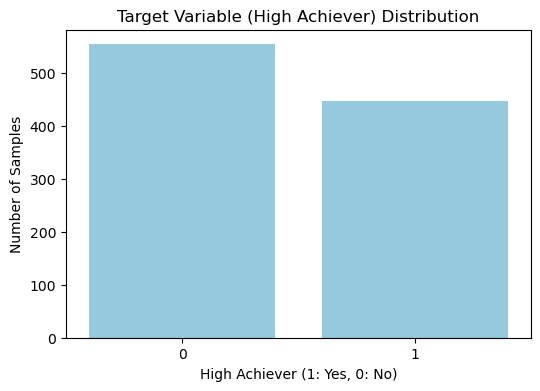

In [87]:
# Set the figure size for the plot
plt.figure(figsize=(6, 4))

# Create a count plot for the 'high_achiever' column
sns.countplot(x='high_achiever', data=data, color='skyblue')  # Use a single color for the bars

# Add a title and labels to the plot
plt.title('Target Variable (High Achiever) Distribution')
plt.xlabel('High Achiever (1: Yes, 0: No)')
plt.ylabel('Number of Samples')

# Display the plot
plt.show()


## 4. Separating Data into Training and Test Sets



In [91]:
# Separate features (X) and target variable (y)
X = data.drop(columns=['high_achiever', 'total_score', 'average_score'])  # Exclude target and derived score columns
y = data['high_achiever']  # Target variable

# Split the data into training and test sets (70% training, 30% test) with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print the size of the training and test sets
print("Training Set Size:", X_train.shape[0])
print("Test Set Size:", X_test.shape[0])


Training Set Size: 700
Test Set Size: 300


## 5. Decision Tree Model



Decision Tree Performance Metrics:
Truth: 0.9833333333333333
Sensibility: 1.0
Recall: 0.9626865671641791
F1 Skor: 0.9809885931558935


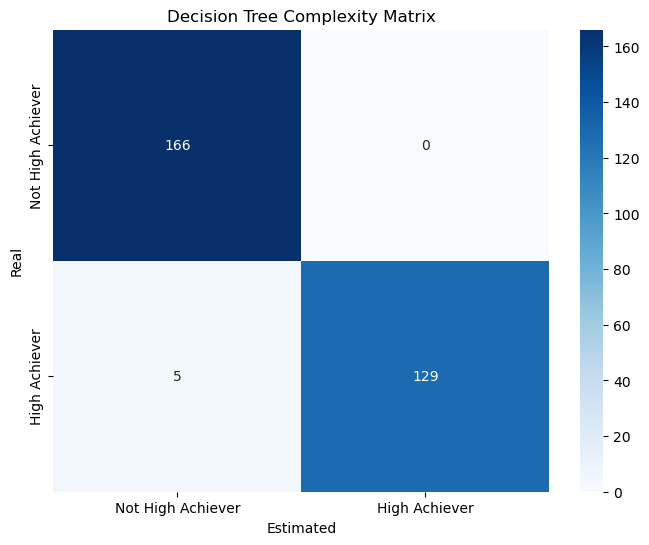

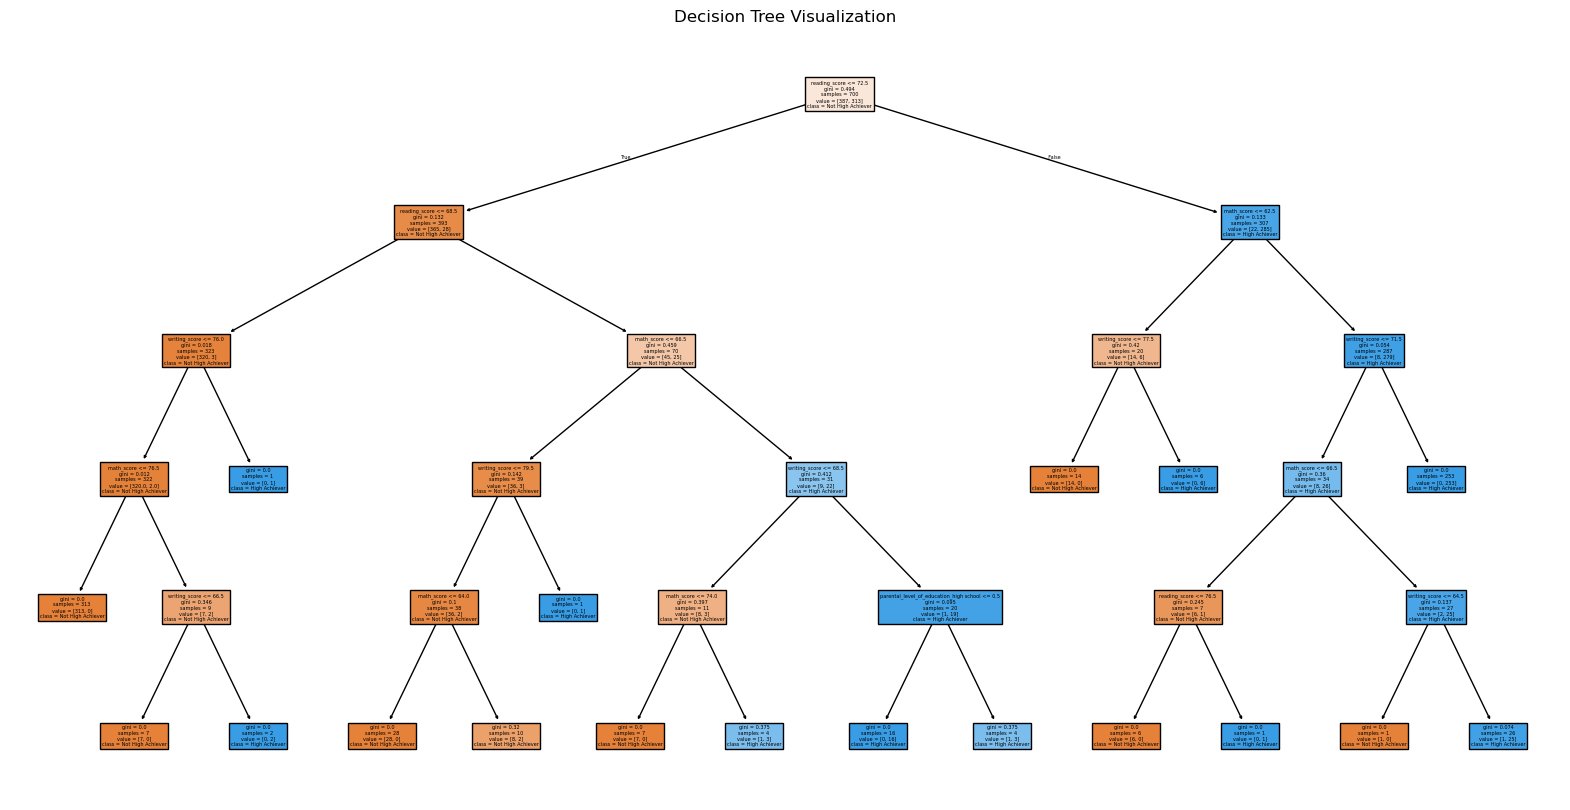

In [94]:



dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)


print("Decision Tree Performance Metrics:")
print("Truth:", accuracy_score(y_test, y_pred_dt))
print("Sensibility:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Skor:", f1_score(y_test, y_pred_dt))


conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not High Achiever", "High Achiever"], yticklabels=["Not High Achiever", "High Achiever"])
plt.title("Decision Tree Complexity Matrix")
plt.xlabel("Estimated")
plt.ylabel("Real")
plt.show()


plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["Not High Achiever", "High Achiever"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


## 6. Random Forest Model


Random Forest Performance Metrics:
Truth: 0.9733333333333334
Sensibility: 0.9921875
Recall: 0.9477611940298507
F1 Skor: 0.9694656488549618


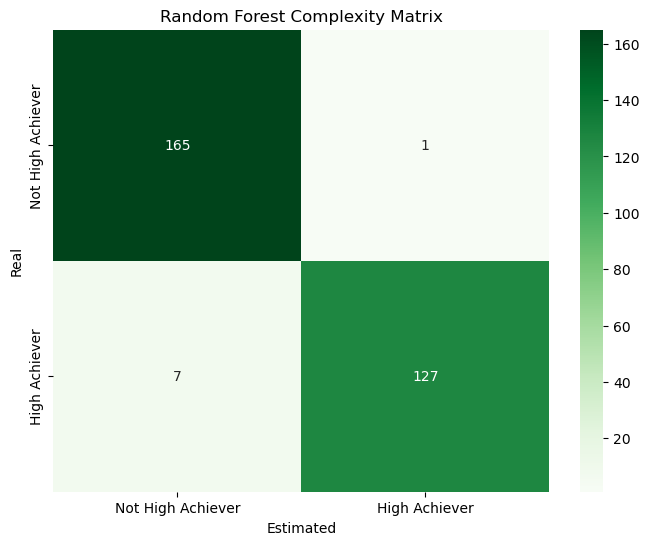

In [96]:



rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


print("Random Forest Performance Metrics:")
print("Truth:", accuracy_score(y_test, y_pred_rf))
print("Sensibility:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Skor:", f1_score(y_test, y_pred_rf))


conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=["Not High Achiever", "High Achiever"], yticklabels=["Not High Achiever", "High Achiever"])
plt.title("Random Forest Complexity Matrix")
plt.xlabel("Estimated")
plt.ylabel("Real")
plt.show()


## 7. Model Performance Comparison


In [99]:



performance = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Truth": [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)],
    "Sensibility": [precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_rf)],
    "Recalla": [recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_rf)],
    "F1 Skor": [f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_rf)]
})

performance


,Model,Truth,Sensibility,Recalla,F1 Skor
0,Decision Tree,0.983333,1.000000,0.962687,0.980989
1,Random Forest,0.973333,0.992188,0.947761,0.969466


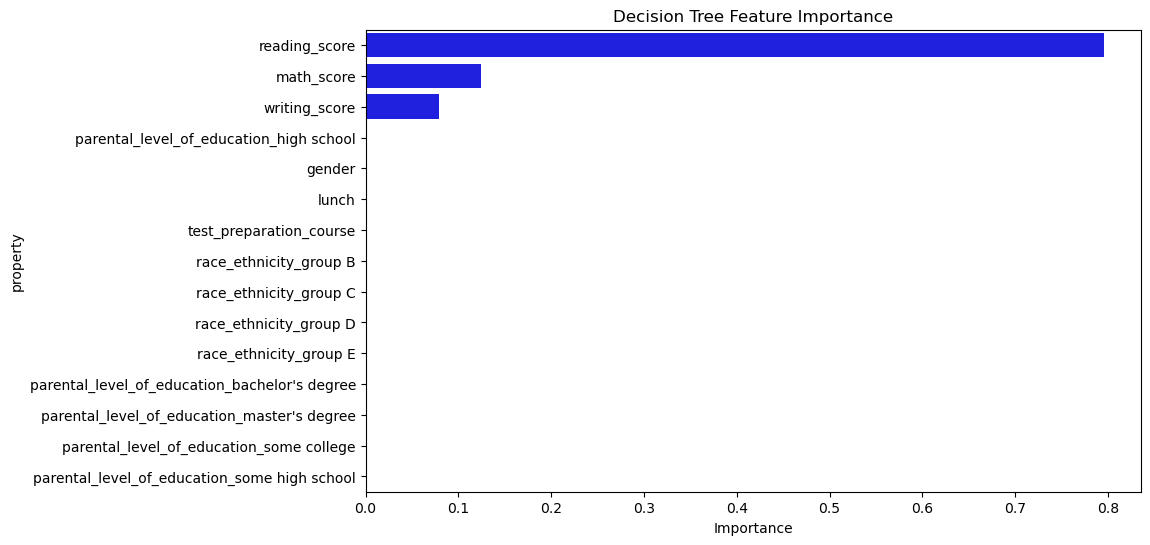

In [113]:



dt_feature_importance = pd.DataFrame({
    "property": X.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Feature Importance Visualization for Decision Tree
plt.figure(figsize=(10, 6))
sns.barplot(x=dt_feature_importance["Importance"], y=dt_feature_importance["property"], color="blue")  # Tek renk belirledik
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance")
plt.ylabel("property")
plt.show()



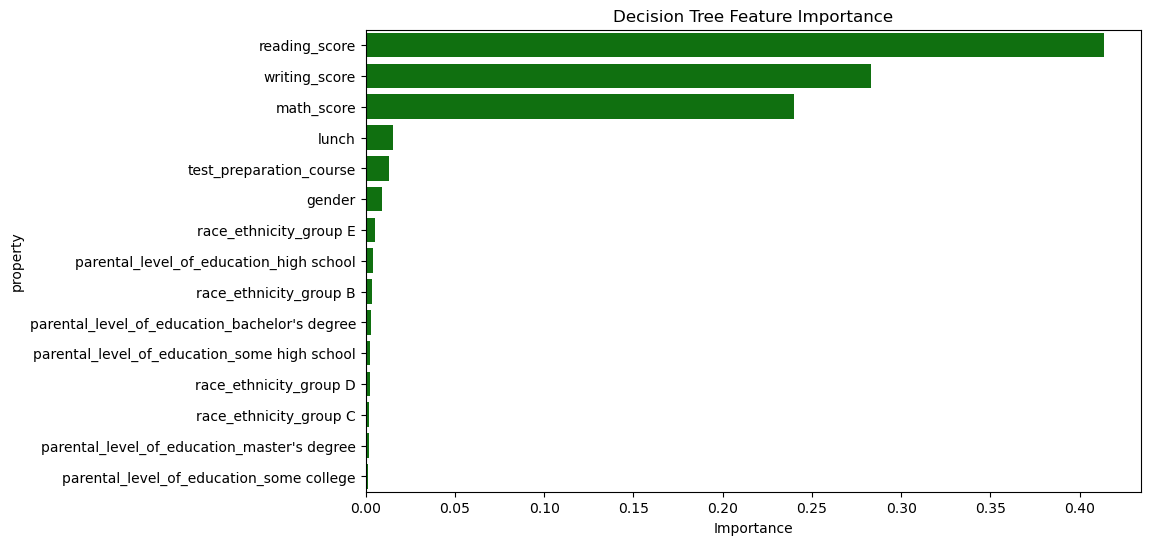

In [103]:

rf_feature_importance = pd.DataFrame({
    "property": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=rf_feature_importance["Importance"], y=rf_feature_importance["property"], color="green")  # Tek renk belirledik
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance")
plt.ylabel("property")
plt.show()


Standardized Data (Numeric Output):
   Feature1  Feature2
0 -1.224745 -1.317064
1  0.000000  0.212430
2  1.224745  1.104634


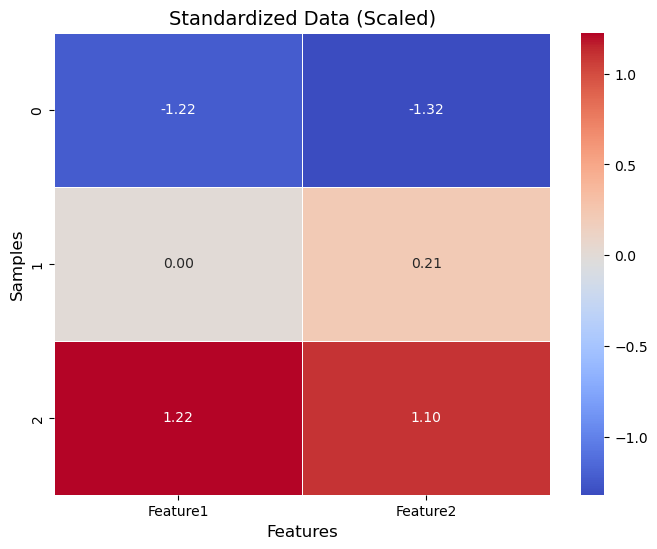

In [111]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Create sample DataFrame
data = {
    'Timestamp': ['2023-01-01', '2023-01-02', '2023-01-03'],
    'Plant_ID': [101, 102, 103],
    'Plant_Health_Status': ['Good', 'Poor', 'Average'],
    'Feature1': [0.1, 0.3, 0.5],
    'Feature2': [1.2, 2.4, 3.1]
}

# Create DataFrame
plant_health_data = pd.DataFrame(data)

# Drop unnecessary columns
columns_to_drop = ['Timestamp', 'Plant_ID', 'Plant_Health_Status']
preprocessed_data = plant_health_data.drop(columns=columns_to_drop)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(preprocessed_data)

# Convert standardized data to DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=preprocessed_data.columns)

# Display numeric output
print("Standardized Data (Numeric Output):")
print(scaled_data_df)

# Visualize the standardized data
plt.figure(figsize=(8, 6))
ax = sns.heatmap(scaled_data_df, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f", cbar=True)

# Set graph title and labels
ax.set_title("Standardized Data (Scaled)", fontsize=14)
ax.set_xlabel("Features", fontsize=12)
ax.set_ylabel("Samples", fontsize=12)

# Show the graph
plt.show()